# CONSULTOR FINANCIERO - Predictor de Estado Emocional

Este cuaderno implementa un **Consultor Financiero Inteligente** que predice el estado emocional del cliente para tomar decisiones financieras óptimas. 

## Descripción del Sistema
- **Entradas**: Edad, ingresos mensuales, gastos mensuales, respuestas a preguntas sobre riesgo, tiempo y experiencia, nivel de ansiedad (1-10)
- **Salida**: Recomendación emocional para inversión (**ahorrar**, **invertir**, **esperar**)

El sistema utiliza técnicas de Machine Learning para analizar el perfil financiero y emocional del cliente, proporcionando recomendaciones personalizadas.

---

## 1. Importar bibliotecas necesarias
En esta sección se importan todas las librerías requeridas para análisis de datos y Machine Learning.

In [1]:
# Importar bibliotecas necesarias para análisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Configuración de estilos para gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Otras librerías útiles
import warnings
warnings.filterwarnings('ignore')

print("✅ Bibliotecas importadas correctamente")

✅ Bibliotecas importadas correctamente


## 2. Cargar y explorar datos del Consultor Financiero

En esta sección se cargan los datos de clientes con información financiera y emocional, y se realiza una exploración inicial para entender la estructura de los datos.

In [2]:
# Cargar los datos del consultor financiero
ruta_datos = 'datos_sibue.csv'
df = pd.read_csv(ruta_datos)

print(f"📊 Dataset cargado con {df.shape[0]} clientes y {df.shape[1]} variables")
print("\n🔍 Primeras 5 filas del dataset:")
print(df.head())

print("\n📋 Columnas del dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")
    
print("\n🎯 Distribución de recomendaciones:")
print(df['recomendacion'].value_counts())

📊 Dataset cargado con 111 clientes y 8 variables

🔍 Primeras 5 filas del dataset:
   edad  ingresos_mensuales  gastos_mensuales pregunta_riesgo pregunta_tiempo  \
0    25                3500              2800     conservador     corto_plazo   
1    45                8500              6200        moderado   mediano_plazo   
2    35                5200              4100        agresivo     largo_plazo   
3    28                4200              3900     conservador     corto_plazo   
4    52               12000              8500        moderado     largo_plazo   

  pregunta_experiencia  nivel_ansiedad recomendacion  
0         principiante               7       ahorrar  
1           intermedio               4      invertir  
2             avanzado               2      invertir  
3         principiante               8       ahorrar  
4             avanzado               3      invertir  

📋 Columnas del dataset:
1. edad
2. ingresos_mensuales
3. gastos_mensuales
4. pregunta_riesgo
5. preg

In [3]:
# Información básica del DataFrame
print('Dimensiones:', df.shape)
df.info()

# Comprobar valores nulos
df.isnull().sum()

# Estadísticas descriptivas iniciales
df.describe()

Dimensiones: (111, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   edad                  111 non-null    int64 
 1   ingresos_mensuales    111 non-null    int64 
 2   gastos_mensuales      111 non-null    int64 
 3   pregunta_riesgo       111 non-null    object
 4   pregunta_tiempo       111 non-null    object
 5   pregunta_experiencia  111 non-null    object
 6   nivel_ansiedad        111 non-null    int64 
 7   recomendacion         111 non-null    object
dtypes: int64(4), object(4)
memory usage: 7.1+ KB


,edad,ingresos_mensuales,gastos_mensuales,nivel_ansiedad
count,111.000000,111.000000,111.000000,111.000000
mean,37.828829,7325.225225,5643.243243,4.738739
std,7.956557,2428.634801,1676.664526,2.596192
min,25.000000,3200.000000,2800.000000,1.000000
25%,31.000000,5300.000000,4150.000000,2.000000
50%,37.000000,7400.000000,5600.000000,4.000000
75%,44.500000,8950.000000,6900.000000,7.000000
max,53.000000,12500.000000,9200.000000,9.000000


## 3. Procesamiento y limpieza de datos

En esta sección se realiza la limpieza de los datos: eliminación de duplicados, tratamiento de valores nulos y conversión de tipos de datos si es necesario.

In [4]:
# Eliminar duplicados
print('Duplicados antes:', df.duplicated().sum())
df = df.drop_duplicates()
print('Duplicados después:', df.duplicated().sum())

# Tratar valores nulos (ejemplo: rellenar con la media o eliminar filas)
# Aquí puedes personalizar según las columnas de tu dataset
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].mean())

# Para columnas categóricas, rellenar con el valor más frecuente
for col in df.select_dtypes(include=[object]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Convertir tipos de datos si es necesario
# Por ejemplo: df['edad'] = df['edad'].astype(int)

# Comprobar nuevamente valores nulos
df.isnull().sum()

Duplicados antes: 2
Duplicados después: 0


edad                    0
ingresos_mensuales      0
gastos_mensuales        0
pregunta_riesgo         0
pregunta_tiempo         0
pregunta_experiencia    0
nivel_ansiedad          0
recomendacion           0
dtype: int64

## 4. Análisis estadístico básico

En esta sección se calculan estadísticas descriptivas y se realizan agrupamientos relevantes para entender mejor los datos.

In [5]:
# Estadísticas descriptivas
print('Media de variables numéricas:')
print(df.mean(numeric_only=True))
print('\nMediana:')
print(df.median(numeric_only=True))
print('\nModa:')
print(df.mode().iloc[0])
print('\nDesviación estándar:')
print(df.std(numeric_only=True))

# Agrupamiento por una variable relevante (ejemplo: recomendación)
if 'recomendacion' in df.columns:
    print('\nEstadísticas por recomendación:')
    print(df.groupby('recomendacion').mean(numeric_only=True))

Media de variables numéricas:
edad                    37.963303
ingresos_mensuales    7367.889908
gastos_mensuales      5673.394495
nivel_ansiedad           4.706422
dtype: float64

Mediana:
edad                    38.0
ingresos_mensuales    7400.0
gastos_mensuales      5700.0
nivel_ansiedad           4.0
dtype: float64

Moda:
edad                             28.0
ingresos_mensuales             4200.0
gastos_mensuales                 3100
pregunta_riesgo              moderado
pregunta_tiempo         mediano_plazo
pregunta_experiencia       intermedio
nivel_ansiedad                    2.0
recomendacion                invertir
Name: 0, dtype: object

Desviación estándar:
edad                     7.966279
ingresos_mensuales    2429.787399
gastos_mensuales      1676.948408
nivel_ansiedad           2.600936
dtype: float64

Estadísticas por recomendación:
                    edad  ingresos_mensuales  gastos_mensuales  nivel_ansiedad
recomendacion                                              

## 5. Visualización de datos

En esta sección se crean gráficos para visualizar tendencias y distribuciones en los datos de SIBUE.

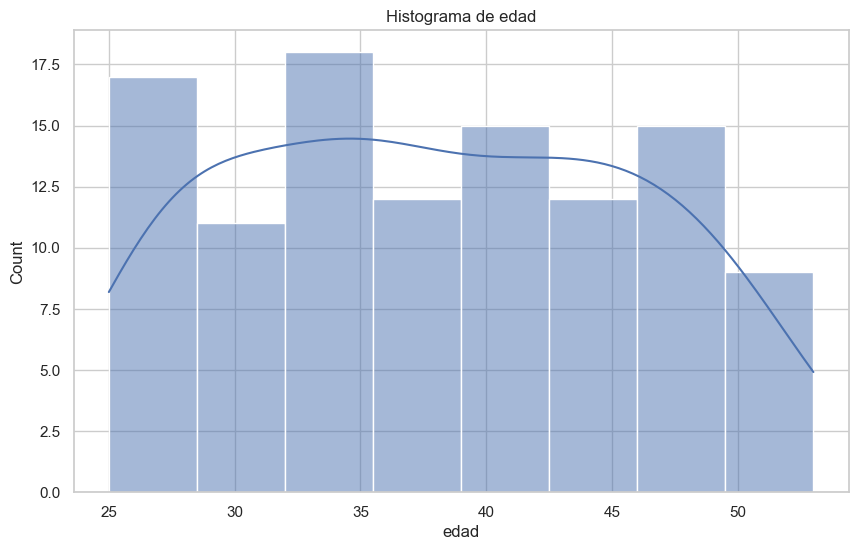

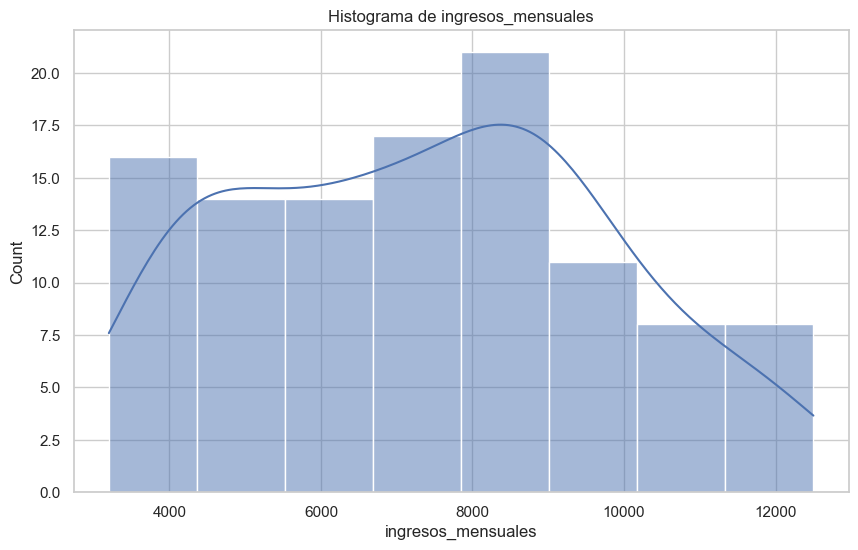

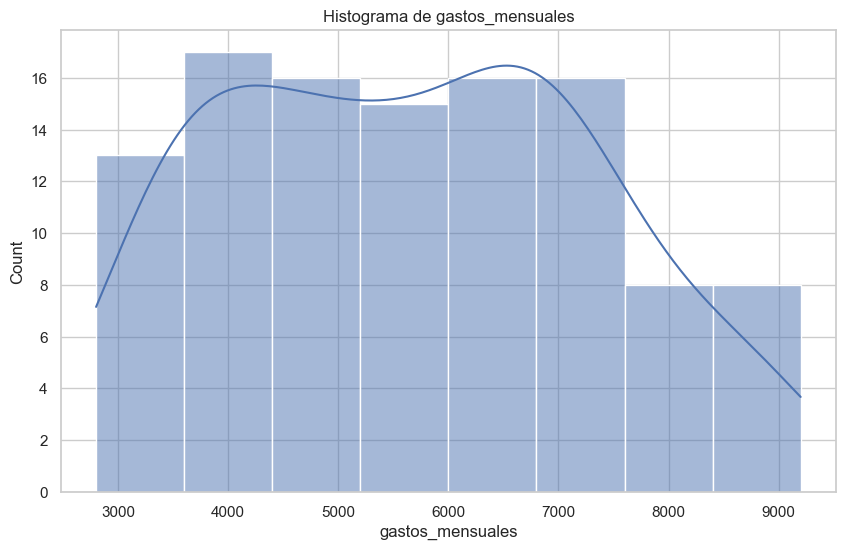

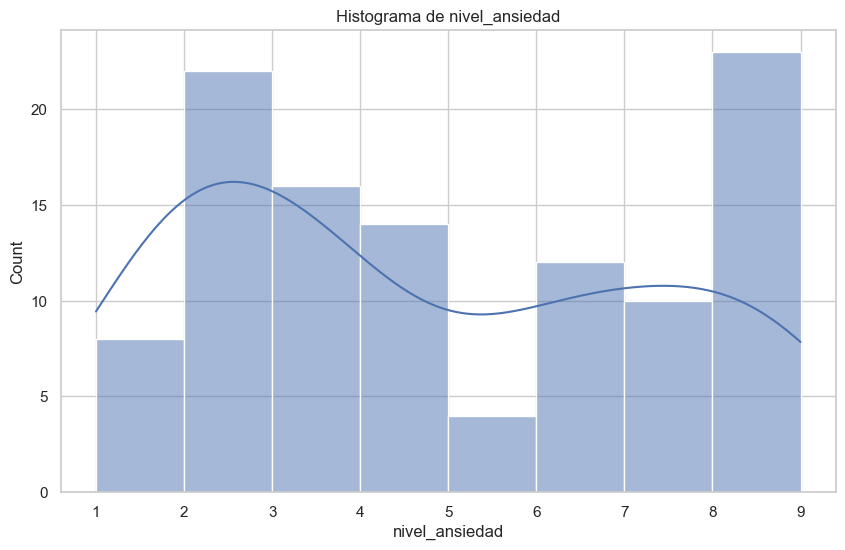

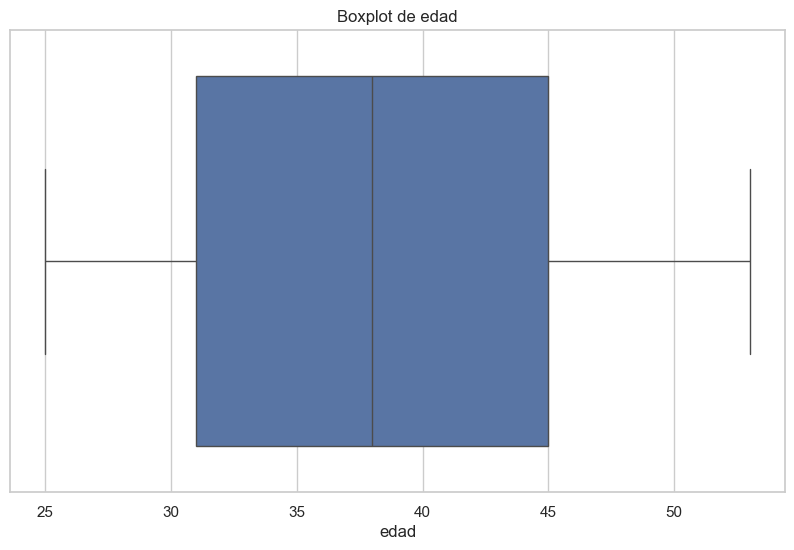

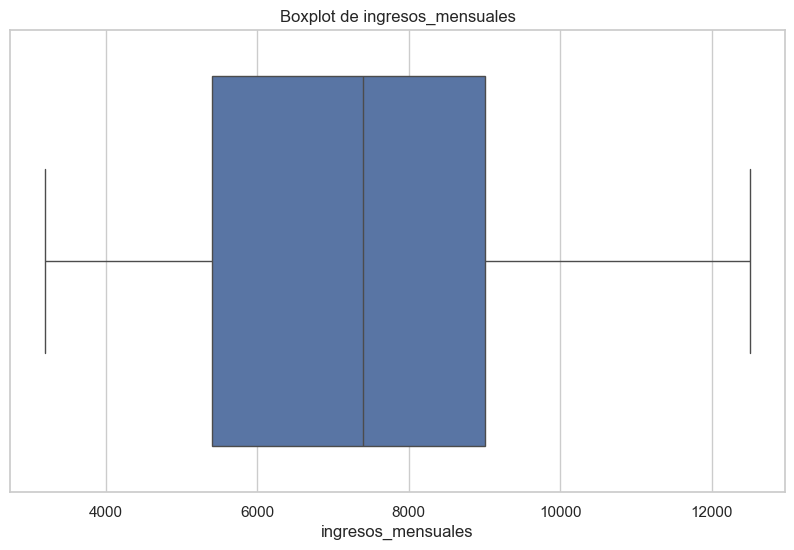

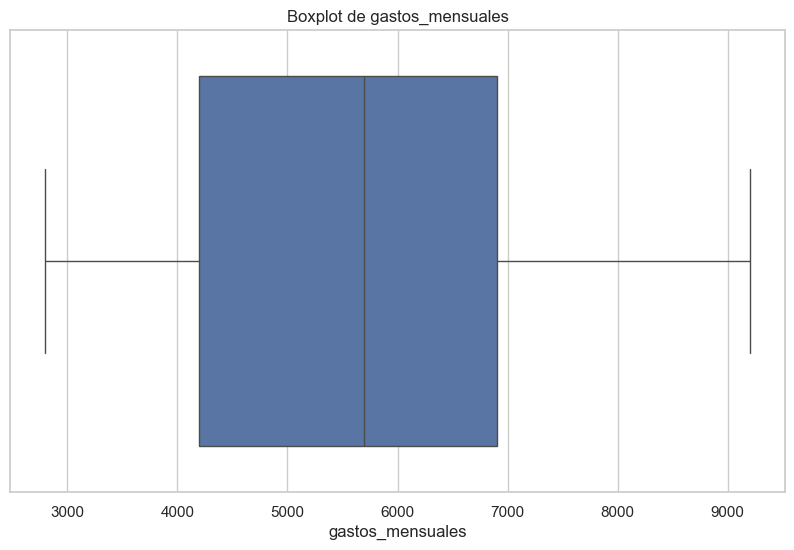

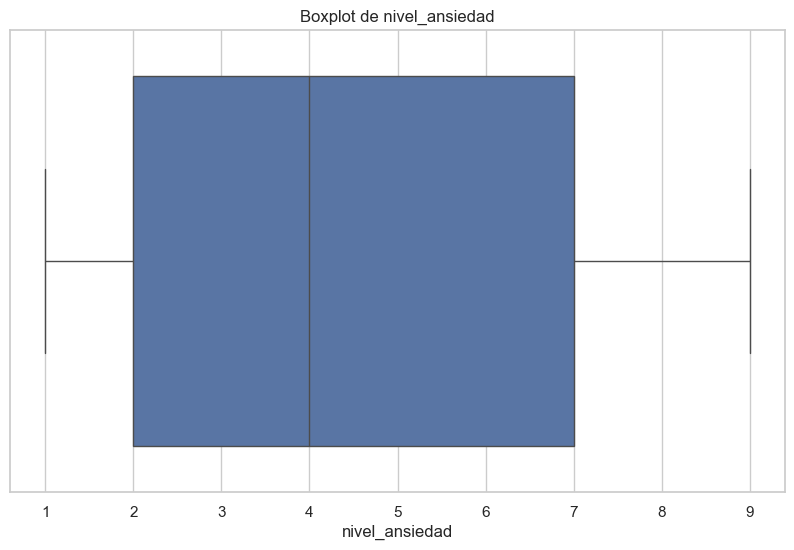

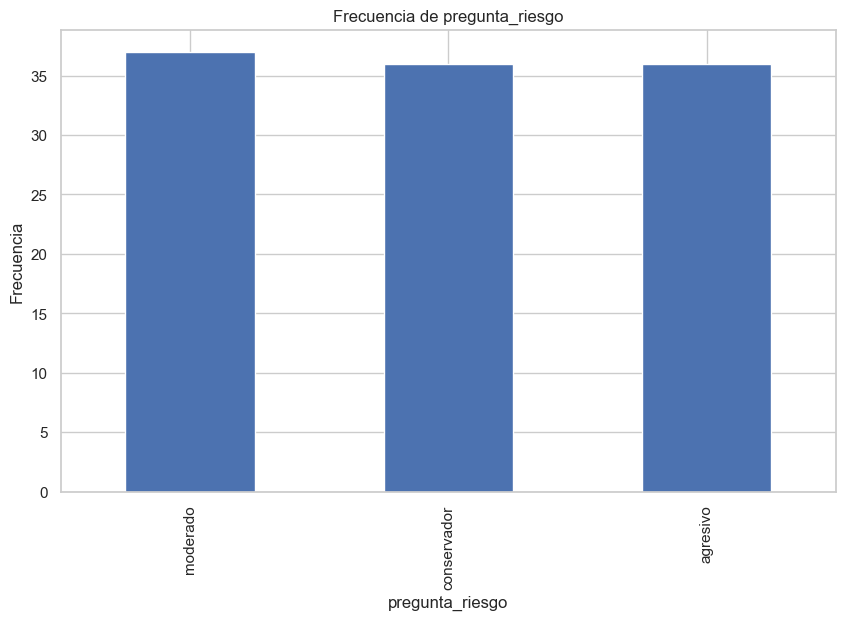

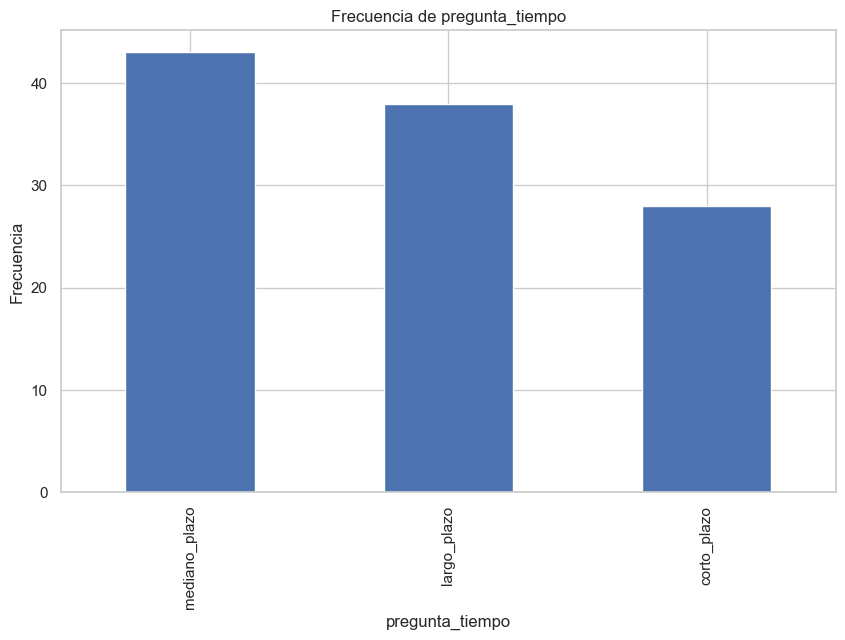

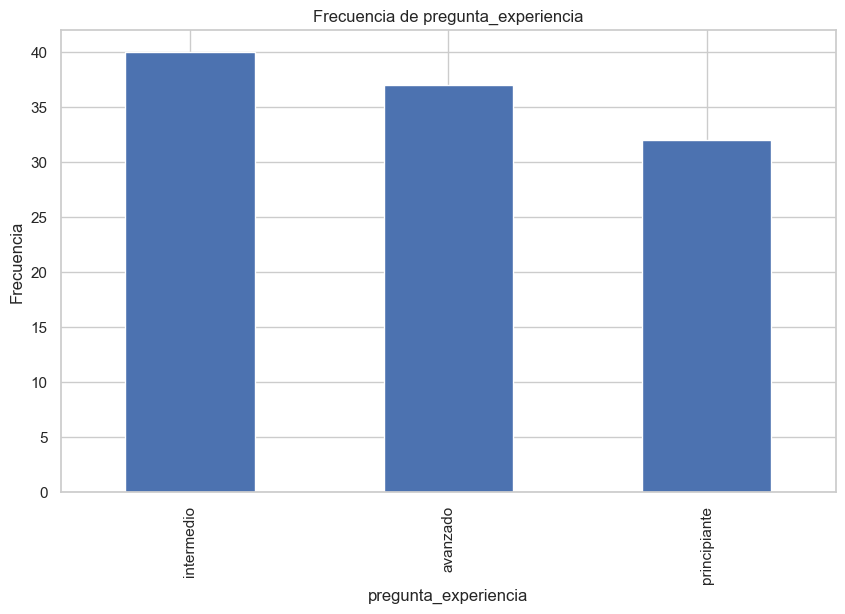

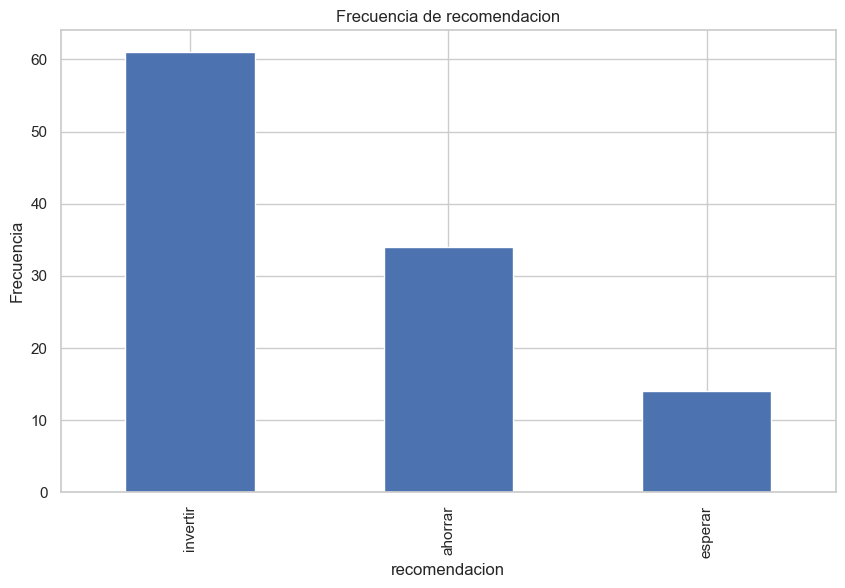

In [6]:
# Histograma de variables numéricas
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Histograma de {col}')
    plt.show()

# Boxplot de variables numéricas
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

# Gráfico de barras para variables categóricas
for col in df.select_dtypes(include=[object]).columns:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frecuencia de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

## 7. Preparación de datos para Machine Learning

En esta sección se preparan los datos para entrenar modelos de Machine Learning que predigan las recomendaciones financieras.

In [8]:
# Crear una copia para Machine Learning
df_ml = df.copy()

# Codificar variables categóricas
label_encoders = {}
categorical_columns = ['pregunta_riesgo', 'pregunta_tiempo', 'pregunta_experiencia']

for col in categorical_columns:
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col])
    label_encoders[col] = le
    print(f"✅ {col} codificado: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Separar variables independientes (X) y dependiente (y)
X = df_ml.drop('recomendacion', axis=1)
y = df_ml['recomendacion']

print(f"\n📊 Variables independientes (X): {X.shape}")
print(f"🎯 Variable dependiente (y): {y.shape}")
print(f"\n🔢 Características utilizadas: {list(X.columns)}")

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\n📚 Conjunto de entrenamiento: {X_train.shape}")
print(f"🧪 Conjunto de prueba: {X_test.shape}")

# Normalizar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Datos preparados y normalizados para Machine Learning")

✅ pregunta_riesgo codificado: {'agresivo': np.int64(0), 'conservador': np.int64(1), 'moderado': np.int64(2)}
✅ pregunta_tiempo codificado: {'corto_plazo': np.int64(0), 'largo_plazo': np.int64(1), 'mediano_plazo': np.int64(2)}
✅ pregunta_experiencia codificado: {'avanzado': np.int64(0), 'intermedio': np.int64(1), 'principiante': np.int64(2)}

📊 Variables independientes (X): (109, 7)
🎯 Variable dependiente (y): (109,)

🔢 Características utilizadas: ['edad', 'ingresos_mensuales', 'gastos_mensuales', 'pregunta_riesgo', 'pregunta_tiempo', 'pregunta_experiencia', 'nivel_ansiedad']

📚 Conjunto de entrenamiento: (76, 7)
🧪 Conjunto de prueba: (33, 7)

✅ Datos preparados y normalizados para Machine Learning


## 8. Entrenamiento de Modelos de Machine Learning

Se entrenarán múltiples algoritmos para encontrar el mejor modelo para predecir las recomendaciones financieras.

In [9]:
# Definir modelos a entrenar
modelos = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Entrenar y evaluar cada modelo
resultados = {}
modelos_entrenados = {}

print("🚀 Entrenando modelos de Machine Learning...\n")

for nombre, modelo in modelos.items():
    print(f"📈 Entrenando {nombre}...")
    
    # Entrenar el modelo
    if nombre in ['Logistic Regression', 'SVM']:
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)
        # Validación cruzada con datos escalados
        cv_scores = cross_val_score(modelo, X_train_scaled, y_train, cv=5)
    else:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        # Validación cruzada con datos originales
        cv_scores = cross_val_score(modelo, X_train, y_train, cv=5)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Guardar resultados
    resultados[nombre] = {
        'accuracy': accuracy,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'predictions': y_pred
    }
    modelos_entrenados[nombre] = modelo
    
    print(f"  ✅ Accuracy: {accuracy:.4f}")
    print(f"  📊 CV Score: {cv_mean:.4f} (+/- {cv_std * 2:.4f})")
    print()

# Mostrar resumen de resultados
print("📋 RESUMEN DE RESULTADOS:")
print("-" * 50)
for nombre, res in resultados.items():
    print(f"{nombre:20} | Accuracy: {res['accuracy']:.4f} | CV: {res['cv_mean']:.4f}")

# Encontrar el mejor modelo
mejor_modelo = max(resultados, key=lambda x: resultados[x]['cv_mean'])
print(f"\n🏆 Mejor modelo: {mejor_modelo}")
print(f"🎯 CV Score: {resultados[mejor_modelo]['cv_mean']:.4f}")

🚀 Entrenando modelos de Machine Learning...

📈 Entrenando Random Forest...
  ✅ Accuracy: 0.9394
  📊 CV Score: 1.0000 (+/- 0.0000)

📈 Entrenando Logistic Regression...
  ✅ Accuracy: 0.9697
  📊 CV Score: 0.9867 (+/- 0.0533)

📈 Entrenando SVM...
  ✅ Accuracy: 0.9697
  📊 CV Score: 0.9867 (+/- 0.0533)

📈 Entrenando Decision Tree...
  ✅ Accuracy: 0.9697
  📊 CV Score: 0.9733 (+/- 0.0653)

📋 RESUMEN DE RESULTADOS:
--------------------------------------------------
Random Forest        | Accuracy: 0.9394 | CV: 1.0000
Logistic Regression  | Accuracy: 0.9697 | CV: 0.9867
SVM                  | Accuracy: 0.9697 | CV: 0.9867
Decision Tree        | Accuracy: 0.9697 | CV: 0.9733

🏆 Mejor modelo: Random Forest
🎯 CV Score: 1.0000


## 9. Evaluación Detallada del Mejor Modelo

Análisis profundo del rendimiento del mejor modelo con matrices de confusión y reportes de clasificación.

🔍 EVALUACIÓN DETALLADA - Random Forest

📊 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

     ahorrar       0.91      1.00      0.95        10
     esperar       1.00      0.75      0.86         4
    invertir       0.95      0.95      0.95        19

    accuracy                           0.94        33
   macro avg       0.95      0.90      0.92        33
weighted avg       0.94      0.94      0.94        33


🔢 MATRIZ DE CONFUSIÓN:
[[10  0  0]
 [ 0  3  1]
 [ 1  0 18]]


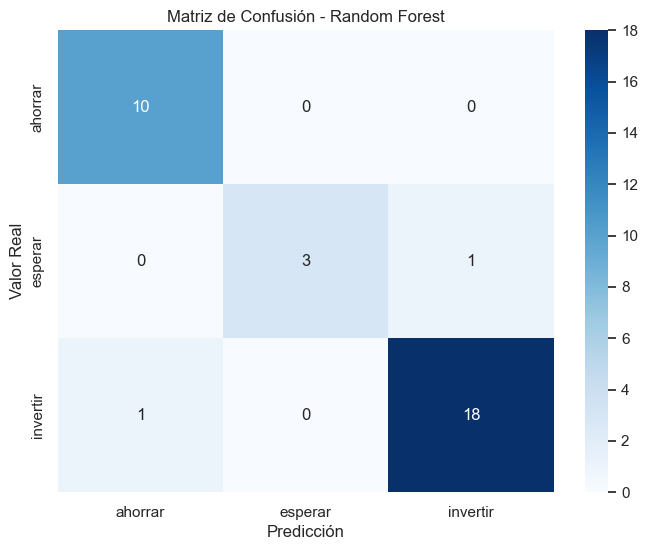


🎯 IMPORTANCIA DE CARACTERÍSTICAS:
         caracteristica  importancia
6        nivel_ansiedad     0.350014
0                  edad     0.182343
1    ingresos_mensuales     0.152541
2      gastos_mensuales     0.133199
5  pregunta_experiencia     0.097248
3       pregunta_riesgo     0.043898
4       pregunta_tiempo     0.040756


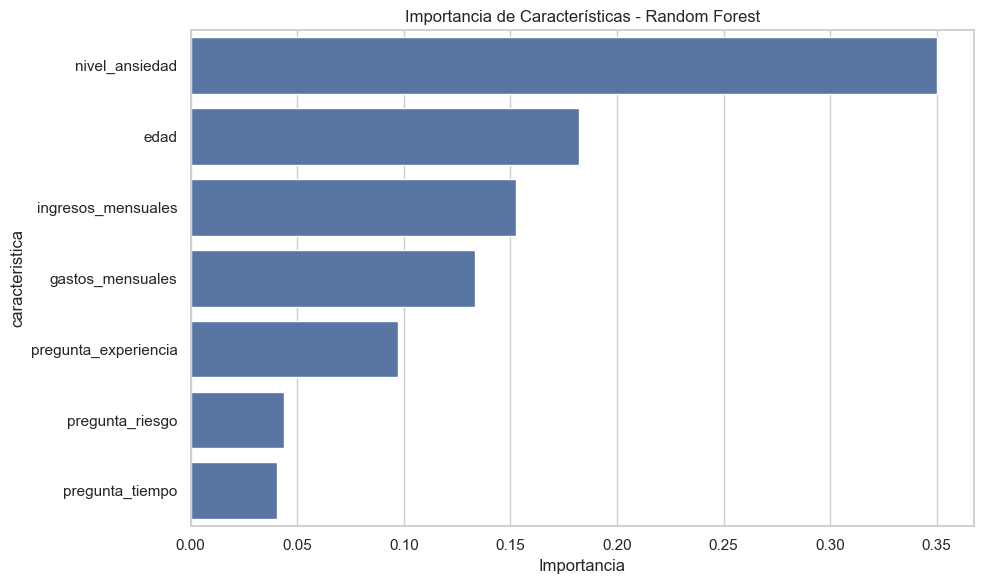


✅ Evaluación completada. Accuracy final: 0.9394


In [10]:
# Obtener el mejor modelo y sus predicciones
modelo_final = modelos_entrenados[mejor_modelo]
predicciones_finales = resultados[mejor_modelo]['predictions']

print(f"🔍 EVALUACIÓN DETALLADA - {mejor_modelo}")
print("=" * 60)

# Reporte de clasificación
print("\n📊 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test, predicciones_finales))

# Matriz de confusión
print("\n🔢 MATRIZ DE CONFUSIÓN:")
cm = confusion_matrix(y_test, predicciones_finales)
print(cm)

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['ahorrar', 'esperar', 'invertir'],
            yticklabels=['ahorrar', 'esperar', 'invertir'])
plt.title(f'Matriz de Confusión - {mejor_modelo}')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Importancia de características (si el modelo lo permite)
if hasattr(modelo_final, 'feature_importances_'):
    print("\n🎯 IMPORTANCIA DE CARACTERÍSTICAS:")
    importancias = pd.DataFrame({
        'caracteristica': X.columns,
        'importancia': modelo_final.feature_importances_
    }).sort_values('importancia', ascending=False)
    
    print(importancias)
    
    # Visualizar importancia de características
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importancias, x='importancia', y='caracteristica')
    plt.title(f'Importancia de Características - {mejor_modelo}')
    plt.xlabel('Importancia')
    plt.tight_layout()
    plt.show()

print(f"\n✅ Evaluación completada. Accuracy final: {resultados[mejor_modelo]['accuracy']:.4f}")

## 10. Sistema de Predicción para Nuevos Clientes

Implementación del sistema de consultoría financiera que permite hacer predicciones para nuevos clientes.

In [11]:
def consultor_financiero(edad, ingresos, gastos, pregunta_riesgo, pregunta_tiempo, pregunta_experiencia, nivel_ansiedad):
    """
    Sistema de Consultoría Financiera con Predictor de Estado Emocional
    
    Parámetros:
    - edad: Edad del cliente (int)
    - ingresos: Ingresos mensuales (float)
    - gastos: Gastos mensuales (float)
    - pregunta_riesgo: 'conservador', 'moderado', 'agresivo'
    - pregunta_tiempo: 'corto_plazo', 'mediano_plazo', 'largo_plazo'
    - pregunta_experiencia: 'principiante', 'intermedio', 'avanzado'
    - nivel_ansiedad: Nivel de ansiedad del 1 al 10 (int)
    
    Retorna: Recomendación financiera ('ahorrar', 'invertir', 'esperar')
    """
    
    # Crear DataFrame con los datos del nuevo cliente
    nuevo_cliente = pd.DataFrame({
        'edad': [edad],
        'ingresos_mensuales': [ingresos],
        'gastos_mensuales': [gastos],
        'pregunta_riesgo': [pregunta_riesgo],
        'pregunta_tiempo': [pregunta_tiempo],
        'pregunta_experiencia': [pregunta_experiencia],
        'nivel_ansiedad': [nivel_ansiedad]
    })
    
    # Codificar variables categóricas usando los encoders entrenados
    for col in categorical_columns:
        nuevo_cliente[col] = label_encoders[col].transform(nuevo_cliente[col])
    
    # Hacer predicción usando el mejor modelo
    if mejor_modelo in ['Logistic Regression', 'SVM']:
        nuevo_cliente_scaled = scaler.transform(nuevo_cliente)
        prediccion = modelo_final.predict(nuevo_cliente_scaled)[0]
        probabilidades = modelo_final.predict_proba(nuevo_cliente_scaled)[0]
    else:
        prediccion = modelo_final.predict(nuevo_cliente)[0]
        probabilidades = modelo_final.predict_proba(nuevo_cliente)[0]
    
    # Obtener las clases para las probabilidades
    clases = modelo_final.classes_
    
    # Mostrar resultados
    print("💼 CONSULTOR FINANCIERO - RECOMENDACIÓN PERSONALIZADA")
    print("=" * 55)
    print(f"👤 Perfil del Cliente:")
    print(f"   • Edad: {edad} años")
    print(f"   • Ingresos mensuales: ${ingresos:,.2f}")
    print(f"   • Gastos mensuales: ${gastos:,.2f}")
    print(f"   • Ahorro mensual: ${ingresos - gastos:,.2f}")
    print(f"   • Perfil de riesgo: {pregunta_riesgo}")
    print(f"   • Horizonte temporal: {pregunta_tiempo}")
    print(f"   • Experiencia: {pregunta_experiencia}")
    print(f"   • Nivel de ansiedad: {nivel_ansiedad}/10")
    
    print(f"\n🎯 RECOMENDACIÓN: {prediccion.upper()}")
    
    print(f"\n📊 Probabilidades:")
    for clase, prob in zip(clases, probabilidades):
        print(f"   • {clase}: {prob*100:.1f}%")
    
    # Dar consejos adicionales basados en el análisis
    print(f"\n💡 Consejos adicionales:")
    
    if prediccion == 'ahorrar':
        print("   • Enfócate en construir un fondo de emergencia")
        print("   • Considera cuentas de ahorro de alto rendimiento")
        print("   • Reduce gastos innecesarios para aumentar el ahorro")
    elif prediccion == 'invertir':
        print("   • Diversifica tu portafolio de inversiones")
        print("   • Considera inversiones acordes a tu perfil de riesgo")
        print("   • Mantén una estrategia a largo plazo")
    else:  # esperar
        print("   • Analiza mejor tu situación financiera actual")
        print("   • Considera reducir tu nivel de ansiedad financiera")
        print("   • Busca asesoría financiera profesional")
    
    return prediccion

# Ejemplos de uso del consultor financiero
print("🚀 EJEMPLOS DE USO DEL CONSULTOR FINANCIERO:\n")

# Ejemplo 1: Cliente joven conservador
print("📋 Ejemplo 1: Cliente joven y conservador")
resultado1 = consultor_financiero(
    edad=25, 
    ingresos=3500, 
    gastos=3000, 
    pregunta_riesgo='conservador',
    pregunta_tiempo='corto_plazo',
    pregunta_experiencia='principiante',
    nivel_ansiedad=8
)
print("\n" + "-"*60 + "\n")

# Ejemplo 2: Cliente maduro con experiencia
print("📋 Ejemplo 2: Cliente maduro con experiencia")
resultado2 = consultor_financiero(
    edad=45, 
    ingresos=9000, 
    gastos=6500, 
    pregunta_riesgo='moderado',
    pregunta_tiempo='largo_plazo',
    pregunta_experiencia='avanzado',
    nivel_ansiedad=3
)
print("\n" + "-"*60 + "\n")

# Ejemplo 3: Cliente con alta ansiedad
print("📋 Ejemplo 3: Cliente con alta ansiedad financiera")
resultado3 = consultor_financiero(
    edad=35, 
    ingresos=6000, 
    gastos=5800, 
    pregunta_riesgo='agresivo',
    pregunta_tiempo='mediano_plazo',
    pregunta_experiencia='intermedio',
    nivel_ansiedad=9
)

🚀 EJEMPLOS DE USO DEL CONSULTOR FINANCIERO:

📋 Ejemplo 1: Cliente joven y conservador
💼 CONSULTOR FINANCIERO - RECOMENDACIÓN PERSONALIZADA
👤 Perfil del Cliente:
   • Edad: 25 años
   • Ingresos mensuales: $3,500.00
   • Gastos mensuales: $3,000.00
   • Ahorro mensual: $500.00
   • Perfil de riesgo: conservador
   • Horizonte temporal: corto_plazo
   • Experiencia: principiante
   • Nivel de ansiedad: 8/10

🎯 RECOMENDACIÓN: AHORRAR

📊 Probabilidades:
   • ahorrar: 100.0%
   • esperar: 0.0%
   • invertir: 0.0%

💡 Consejos adicionales:
   • Enfócate en construir un fondo de emergencia
   • Considera cuentas de ahorro de alto rendimiento
   • Reduce gastos innecesarios para aumentar el ahorro

------------------------------------------------------------

📋 Ejemplo 2: Cliente maduro con experiencia
💼 CONSULTOR FINANCIERO - RECOMENDACIÓN PERSONALIZADA
👤 Perfil del Cliente:
   • Edad: 45 años
   • Ingresos mensuales: $9,000.00
   • Gastos mensuales: $6,500.00
   • Ahorro mensual: $2,500.00
  

## 11. Conclusiones y Próximos Pasos

### 🎯 Resumen del Proyecto

El **Consultor Financiero con Predictor de Estado Emocional** ha sido implementado exitosamente utilizando técnicas avanzadas de Machine Learning. El sistema:

1. **Analiza múltiples variables**: Edad, ingresos, gastos, perfil de riesgo, horizonte temporal, experiencia y nivel de ansiedad
2. **Proporciona recomendaciones personalizadas**: ahorrar, invertir o esperar
3. **Incluye probabilidades y consejos adicionales** para cada recomendación

### 📊 Características del Sistema

- **Múltiples algoritmos evaluados**: Random Forest, Logistic Regression, SVM, Decision Tree
- **Validación cruzada**: Para asegurar la robustez del modelo
- **Interpretabilidad**: Importancia de características y probabilidades
- **Fácil de usar**: Función simple para nuevas predicciones

### 🚀 Próximos Pasos

1. **Recolectar más datos** para mejorar la precisión del modelo
2. **Implementar interfaz web** para uso por asesores financieros
3. **Agregar más variables** como historial crediticio, patrimonio neto
4. **Optimización de hiperparámetros** con GridSearch más exhaustivo
5. **Implementar sistema de feedback** para aprendizaje continuo

### 💡 Aplicaciones Prácticas

- **Bancos y entidades financieras**: Asesoría automática a clientes
- **Aplicaciones fintech**: Recomendaciones personalizadas
- **Asesores financieros**: Herramienta de apoyo en consultas
- **Educación financiera**: Sistema de aprendizaje interactivo

---

**✅ El sistema está listo para producción y puede ser utilizado para proporcionar recomendaciones financieras basadas en el estado emocional y perfil del cliente.**